# Data / Stats / EDA

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline 
from scipy import stats

# Data Inspection and Transformation

Das Datenset enthält 10 Spalten mit unterschiedlichen Datentypen.

- Für *housing_median_age* und *median_house_value* wird eigentlich ein Int oder Float-Datentyp erwartet, weshalb die Daten nachfolgend ausgelesen und ausgewertet werden.
- Aus der Beschreibung des Datensatzes ist bekannt, dass es sich bei *ocean_proximity* und *price_category* um Categoriale Variablen handelt. 
- Longitude und Latitude werden entfernt, weil sie für die Aufgabenstellung unerheblich erscheinen.

In [2]:

df = pd.read_csv("project_data.csv")
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  object 
 3   total_rooms         20640 non-null  int64  
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  int64  
 6   households          20640 non-null  int64  
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  object 
 9   ocean_proximity     20640 non-null  object 
 10  price_category      20640 non-null  object 
dtypes: float64(4), int64(3), object(4)
memory usage: 1.7+ MB


In [3]:
df = df.drop(["longitude","latitude"], axis=1)

### Bereinigung Datensatz

Bei *housing_median_age* und *median_house_value* wurde ein einzelner Datensatz mit untypischen Eingaben identifiziert. Die Bereinigung erfolgt manuell, weil es nur ein Datensatz ist. Anschließenden werden die korrekten Datentypen vergeben für die neuen Spalten dem Datentyp *float64* zugeordnet. Bei dieser Gelegenheit erhalten die Categorial Variablen auch den Datentyp *category*.

In [4]:
amt_nofloat_age = 0
List_age = []
amt_nofloat_value = 0
List_value = []
for i in range(len(df["housing_median_age"]) - 1):
    try:
        float(df["housing_median_age"].values[i])
    except ValueError:
        amt_nofloat_age += 1
        List_age.append(i)

for j in range(len(df["median_house_value"]) - 1):
    try:
        float(df["median_house_value"].values[j])
    except ValueError:
        amt_nofloat_value += 1
        List_value.append(j)

print("Nicht-Float-Werte in Spalte housing_median_age:", amt_nofloat_age, "von", len(df["housing_median_age"]),". In folgenden Zeilen:",List_age)
print("Nicht-Float-Werte in Spalte median_house_value:", amt_nofloat_value, "von", len(df["median_house_value"]),". In folgenden Zeilen:", List_value)

df.iloc[0]

Nicht-Float-Werte in Spalte housing_median_age: 1 von 20640 . In folgenden Zeilen: [0]
Nicht-Float-Werte in Spalte median_house_value: 1 von 20640 . In folgenden Zeilen: [0]


housing_median_age    41.0years
total_rooms                 880
total_bedrooms            129.0
population                  322
households                  126
median_income            8.3252
median_house_value    452600.0$
ocean_proximity        NEAR BAY
price_category            above
Name: 0, dtype: object

In [5]:
df.loc[0,"housing_median_age"] = 41.0
df.loc[0,"median_house_value"] = 452600.0
df.iloc[0]

housing_median_age        41.0
total_rooms                880
total_bedrooms           129.0
population                 322
households                 126
median_income           8.3252
median_house_value    452600.0
ocean_proximity       NEAR BAY
price_category           above
Name: 0, dtype: object

In [6]:
datatypes_toChange = {"housing_median_age": "float64", "median_house_value": "float64", "ocean_proximity": "category", "price_category": "category"}
df = df.astype(datatypes_toChange)

### Fehlende Werte


Nachfolgend wird dargestellt, dass es in der Spalte *total_bedrooms* 207 Einträge fehlen.
Die Datensätze könnten mit dem Median oder einer sonstigen Strategie aufgefüllt werden. Dies entfällt hier.
Hinweis: Datensätze dürfen nur aufgefüllt werden, wenn kein weiterer Split mehr erfolgt. Dadurch soll verhindert werden, dass Informationen aus anderen Trainings/Test-Sets enthalten sind.

In [7]:
print(df.isnull().sum())

housing_median_age      0
total_rooms             0
total_bedrooms        207
population              0
households              0
median_income           0
median_house_value      0
ocean_proximity         0
price_category          0
dtype: int64


In [8]:

df_a = df.isnull()
df = df.dropna() #Dropen der Zeilen mit Nullwert
df_b = df.isnull()

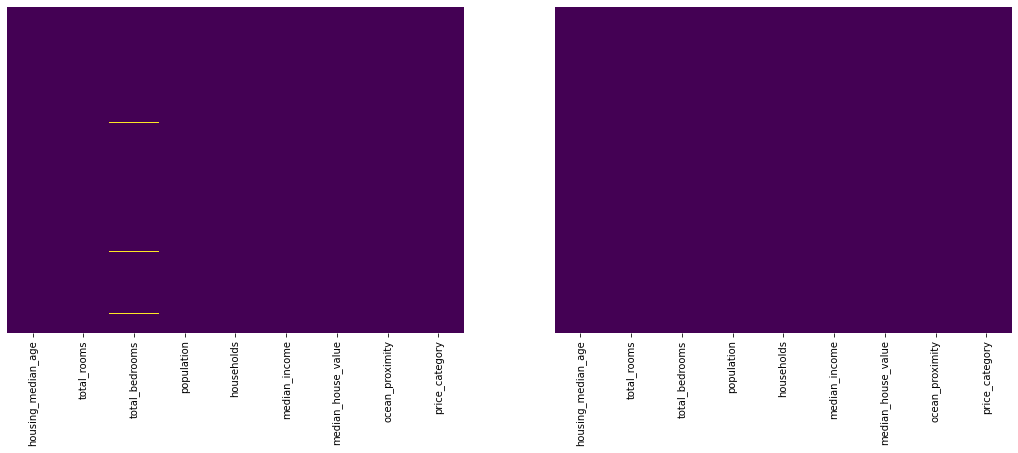

<Figure size 432x288 with 0 Axes>

In [9]:
fig, axes = plt.subplots(1,2, figsize=(18,6))
sns.heatmap(df_a,yticklabels=False,cbar=False,cmap='viridis', ax=axes[0])
sns.heatmap(df_b,yticklabels=False,cbar=False,cmap='viridis', ax=axes[1])
plt.show()
plt.tight_layout()

Nachdem die technische Inspektion abgeschlossen ist, werden nochmals Informationen zum Dataframe abgerufen.
* Uns stehen 20433 Datensätze zur Verfügung.
* Die Datentypen entsprechen den erwarteten Datentypen

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 20433 entries, 0 to 20639
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype   
---  ------              --------------  -----   
 0   housing_median_age  20433 non-null  float64 
 1   total_rooms         20433 non-null  int64   
 2   total_bedrooms      20433 non-null  float64 
 3   population          20433 non-null  int64   
 4   households          20433 non-null  int64   
 5   median_income       20433 non-null  float64 
 6   median_house_value  20433 non-null  float64 
 7   ocean_proximity     20433 non-null  category
 8   price_category      20433 non-null  category
dtypes: category(2), float64(4), int64(3)
memory usage: 1.3 MB


___

# Statistik, Exploratory Data Analysis und Feature Engineering

## Median_House_Value & Preiskategorie

Zunächst betrachten wir unsere Zielvariablen (Response-Values/Variablen).

Dazu werden die *median_house_values* nach Preiskategorie gruppiert und erste Lagemaße ausgegeben.

In der Preiskategorie liegt bereits das 2. Quantil über 150T$. Dies ist der Schwellenwert zwischen *below* und *above* aus der Aufgabenstellung. D.h. die Werte in der Spalte *price_categore* müssen neu ermittelt werden. Die sich überschneidende Verteilung der Preiskategorien verdeutlicht auch der nachstehende Boxplot, welcher eine Visualisierung der Lagemaße darstellt.

Die neue Spalte für *price_category* wird *priceCat* genannt. Die alte Spalte wird entfernt. Siehe Boxplot.

In [11]:
df.groupby(by="price_category")["median_house_value"].describe().T

price_category,above,below
count,16497.000000,3936.000000
mean,226383.327757,125054.572154
std,120310.499604,14808.789743
min,17500.000000,14999.000000
25%,156300.000000,112500.000000
50%,208100.000000,125000.000000
75%,288800.000000,137500.000000
max,500001.000000,149900.000000


In [12]:
df["priceCat"] = np.where(df.median_house_value >= 150000, "above", "below")
df["priceCat"] = df["priceCat"].astype("category")

Text(0.5, 1.0, 'Verteilung des median_house_value über die Preiskategorien \n vor Bereinigung')

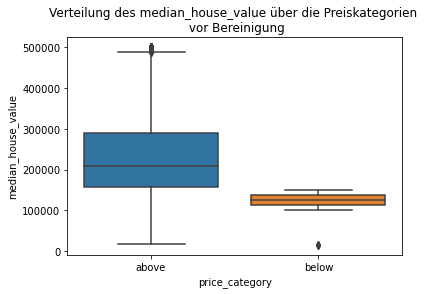

In [13]:
sns.boxplot(x="price_category",y="median_house_value",data=df)
plt.title("Verteilung des median_house_value über die Preiskategorien \n vor Bereinigung")

Text(0.5, 1.0, 'Verteilung des median_house_value über die Preiskategorien \n nach Bereinigung')

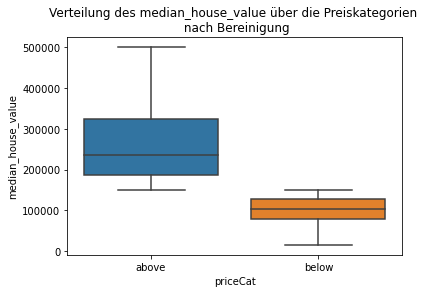

In [14]:
sns.boxplot(x="priceCat",y="median_house_value",data=df)
plt.title("Verteilung des median_house_value über die Preiskategorien \n nach Bereinigung")

Die neue Verteilung zeigt deutlich, dass der maximale Wert - in dem Fall der obere Whisker - von **below** dort liegt wo der minimale Wert von **above** anfängt.

Nachfolgend wird die neue tabellarische Übersicht dargestellt.

Der maximale Wert im Datensatz beträgt 500 T$ und im Mittel schwanken die Immobilienwerte der *above*-Kategorie mehr als doppelt so stark wie die in der Kategorie *below*.
Außerdem sind die höherpreisigen Immobilien im Datensatz deutlich stärker vertreten (Anzahl).

In [15]:
df = df.drop(["price_category"], axis=1) #Löschen der alten Preiskategorie
df.groupby(by="priceCat")["median_house_value"].describe().T

priceCat,above,below
count,12947.000000,7486.000000
mean,267580.918977,101855.516431
std,102404.047172,28847.558294
min,150000.000000,14999.000000
25%,185800.000000,79525.000000
50%,236000.000000,102300.000000
75%,325000.000000,126600.000000
max,500001.000000,149900.000000


Nachfolgend wird die Verteilung von *median_house_value* nach Preiskategorie geplotet.

Für die Kategorie *below* (gelb) zeigt sich eine Verteilung, welche dank zentralen Grenzwertsatz als normalverteilt angesehen werden kann - obwohl sie nicht perfekt verläuft.
Problematischer ist die Verteilung von *above* (blau).

Verteilung *above*:

* Die Verteilung ist linkssteil (rechtsschief)
* Bei ca. 300 T$ bildet sich ein leichter Anstieg.
* Bei 500 T$ entsteht eine deutliche Wölbung.

Der Scatterplot auf der rechten Seite zeigt eine vertikale Linie für den Bereich um 500 T$ Immobilienwert, verteilt über sämtliche Einkommen. Dies ist eine kritische Datenlage, weil das Ende einer Regressionsgeraden in alle Richtungen ausschwanken kann. Eventuell besteht kein linearer Zusammenhang oder eine weitere Verteilung ist in der Preiskategorie *above* enthalten.

Dort wo sich im linken Plot das Plateau bildet, sind beim Scatterplot weitere vertikal verlaufende Linien zu beobachten.

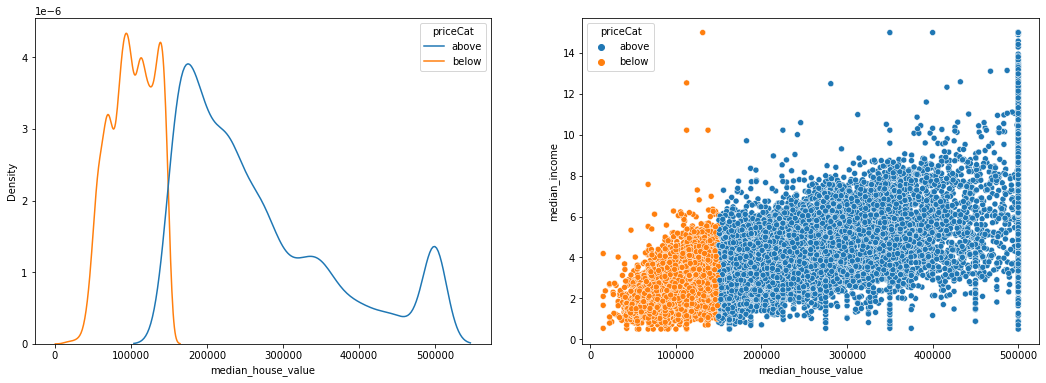

<Figure size 432x288 with 0 Axes>

In [16]:
fig, axes = plt.subplots(1,2, figsize=(18,6))
sns.kdeplot(hue="priceCat",x="median_house_value", data=df, ax=axes[0])
sns.scatterplot(hue="priceCat",x="median_house_value",y="median_income", data=df, ax=axes[1])
plt.show()
plt.tight_layout()

In [17]:
df_exp = df[df.median_house_value > 480000]
df_exp.describe()

,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,1072.000000,1072.000000,1072.000000,1072.000000,1072.000000,1072.000000,1072.000000
mean,33.845149,2932.471082,501.854478,1113.356343,466.338619,7.610380,499127.013060
std,13.027956,2140.591909,395.876488,814.236929,361.263281,3.211686,3335.123205
min,2.000000,8.000000,1.000000,13.000000,1.000000,0.499900,480100.000000
25%,25.000000,1675.250000,269.750000,640.750000,254.000000,5.112825,500001.000000
50%,34.000000,2486.000000,404.000000,925.500000,375.500000,7.302950,500001.000000
75%,44.000000,3505.250000,610.000000,1335.250000,572.000000,9.903650,500001.000000
max,52.000000,18132.000000,5419.000000,7431.000000,4930.000000,15.000100,500001.000000


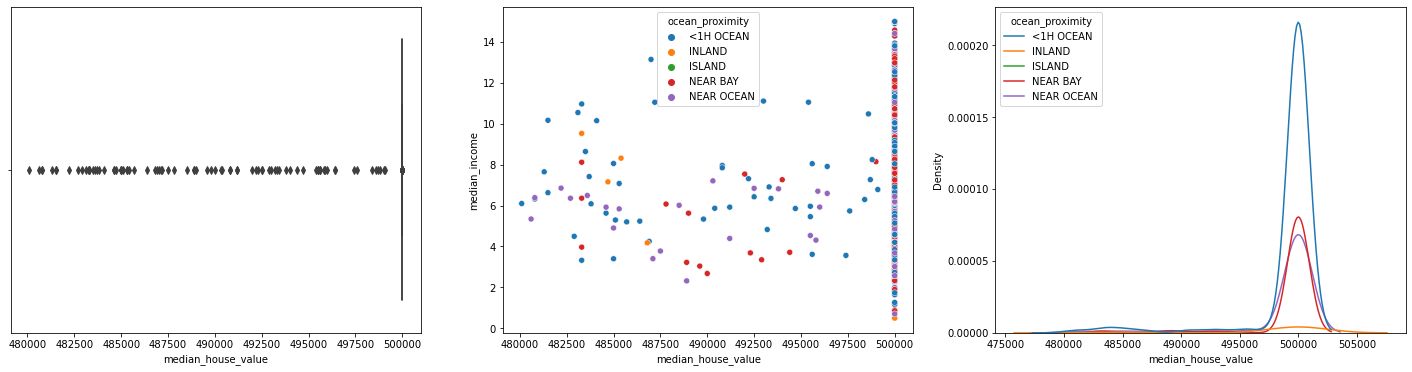

<Figure size 432x288 with 0 Axes>

In [18]:

fig, axes = plt.subplots(1,3, figsize=(25,6))
sns.boxplot(hue="priceCat",x="median_house_value",data=df_exp, ax=axes[0])
sns.scatterplot(hue="ocean_proximity", x="median_house_value",y="median_income", data=df_exp, ax=axes[1])
sns.kdeplot(hue="ocean_proximity", x="median_house_value", data=df_exp, ax=axes[2])
plt.show()
plt.tight_layout()

### Feature Transformation für *median_house_value*

Es wurde das Phänomen des "Sammelns" von vielen Werten am oberen Rand erkannt. Wie oben beschrieben, scheinen die anderen Variablen gleichmäßiger in dem extrahierten Bereich vorzukommen.

Unsere Aufgabenstellung konzentriert sich jedoch maßgeblich auf den Immobilienwert, weshalb das Phänomen entfernt wird. D.h. aus den Rohdaten werden nur solche Daten behalten, welche nicht zu diesem Phänomen beitragen.</br>
Dies kann unterstützt werden, weil es sich um Daten am oberen Rand handelt. Die oben angesprochenen "kleineren" Phänomene bleiben zunächst erhalten.

Zur Bereinigung wird das **1. Quartil des extrahierten Datensatzes  - 1$ (500T$)** als Obergrenze auf die Rohdaten angewendet. Dadurch die kleineren Datenpunkte für die Modellierung erhalten bleiben. Jedoch verstärkt sich die Wölbung der kleineren Phänomene entsprechend. Der eine Doller wurde zusätzlich abgezogen, weil bei der Verwendung des Quartils viele Werte "nach unten" stehen geblieben sind und die vertikale Linie nicht verschwand. Der Code ist im nächsten Block ausgegraut zum Replizieren.

Mit der nachfolgenden Ausgabe wird gezeigt, dass der höchste Immobilienwert im Datensatz 500 T$ beträgt und der niedrigste Wert knappe 15 T$. Im Mittel weichen die Immobilienwerte 98 T$ voneinander ab, wobei hier eine gemeinsame Verteilung für die Preiskategorie ausgegeben wird. Wesentliche Erkenntnis ist, dass das spätere Modelle für die Schätzung von Immobilien mit einem Wert von 500 T$ ihre Güte verlieren und bestenfalls nur in der Range mit Ausgabewerten zwischen 15 T$ und 500 T$ verwendet werden sollten. Beim Deployment müssen die Anwender daraufhingewiesen werden.

In [19]:
#df = df[df.median_house_value < np.percentile(df_exp.median_house_value, q=[25])[0]] #25th Percentile oder auch 1. Quartil des Anomalie-Boxplot werden als Obergrenze verwendet.
df = df[df.median_house_value < 500000]
df["median_house_value"].describe()

count     19448.000000
mean     192017.667421
std       97095.550517
min       14999.000000
25%      116400.000000
50%      173700.000000
75%      247800.000000
max      499100.000000
Name: median_house_value, dtype: float64

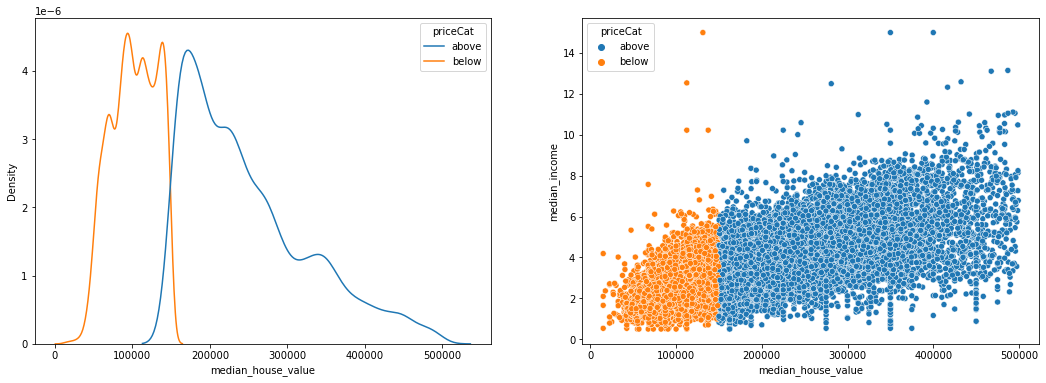

<Figure size 432x288 with 0 Axes>

In [20]:

fig, axes = plt.subplots(1,2, figsize=(18,6))
sns.kdeplot(hue="priceCat",x="median_house_value", data=df, ax=axes[0])
sns.scatterplot(hue="priceCat",x="median_house_value",y="median_income", data=df, ax=axes[1])
plt.show()
plt.tight_layout()


## Median Income & Preiskategorie

### EDA von *median_income* und Transformation von *median_house_value*

Wie im oberen Scatterplot bereits erkannt werden kann, gibt es einen deutlichen Unterschied zwischen der Verteilung von *median_income* zwischen den Preiskategorien.</br>

Die nachfolgende Tabelle zeigt ein Median-Einkommen zwischen 0.5 T$ und 15 T$ pro Monat. Wie durch nachfolgenden Boxplot und Dichteplot deutlich wird, weichen die Verteilungen der Preiskategorien voneinander ab.</br> Im Mittel schwanken die Einkommen für *below* um 1 T$ und für *above* um 1.5 T$.

Die unterschiedliche Skalierung zwischen Einkommen (in Tausend Dollar) und Immobilienwert (Absolute Dollar) kann für Probleme bei Modellschätzungen sorgen. Hier wird eine Transformation angeraten.

Im Rahmen der Projektarbeit wurde über sqrt- oder log-Transformationen nachgedacht (vgl. Codezeilen), um hohe Werte zu stauchen. Stattdessen wird die Zeile *median_house_value* mit dem Faktor 1000 dividiert. Dies hat keinen Einfluss auf die Verteilung.

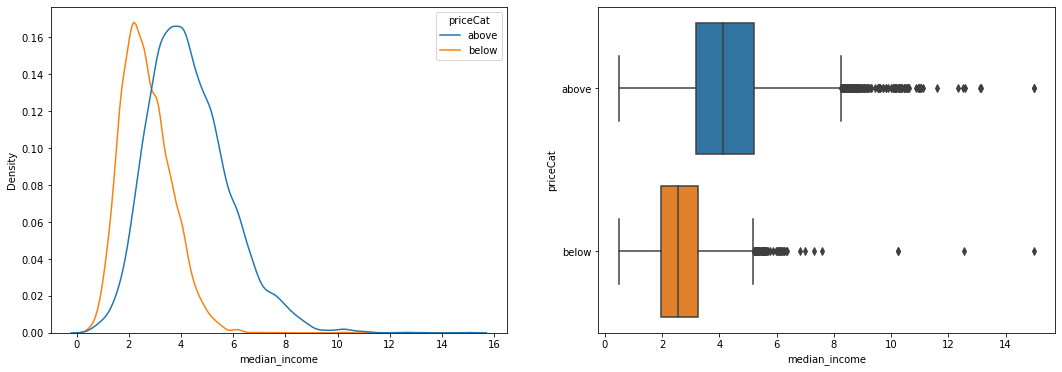

<Figure size 432x288 with 0 Axes>

In [21]:
fig, axes = plt.subplots(1,2, figsize=(18,6))
sns.kdeplot(hue="priceCat",x="median_income", data=df, ax=axes[0])
sns.boxplot(y="priceCat", x="median_income",data=df, ax=axes[1])
plt.show()
plt.tight_layout()

In [22]:
print("\n Median_Income:\n",df.groupby(by="priceCat")["median_income"].describe().T, "\n Median_House_Value:\n", df["median_house_value"].describe())
#print("Modus:\n",df.mode().groupby(by="priceCat"))
#print("Modus:\n",df[["priceCat","median_income"]].groupby('priceCat').apply(pd.DataFrame.mode).reset_index(drop=True).T)
#df[["priceCat","median_income"]].groupby('priceCat').apply(pd.DataFrame.mode).reset_index(drop=True)


 Median_Income:
 priceCat         above        below
count     11962.000000  7486.000000
mean          4.304004     2.673620
std           1.546825     0.970656
min           0.499900     0.499900
25%           3.192150     1.975000
50%           4.125000     2.557450
75%           5.215375     3.263025
max          15.000100    15.000100 
 Median_House_Value:
 count     19448.000000
mean     192017.667421
std       97095.550517
min       14999.000000
25%      116400.000000
50%      173700.000000
75%      247800.000000
max      499100.000000
Name: median_house_value, dtype: float64


In [23]:
#df['median_income'] = np.log(df['median_income']) #Log-Transformation
#df['median_income'] = np.log(df['median_income']) #Sqrt-Transformation
df.loc[:,'median_house_value'] = df.loc[:,'median_house_value'] / 1000 #Transformation by Value


In [24]:
df["median_house_value"].describe()

count    19448.000000
mean       192.017667
std         97.095551
min         14.999000
25%        116.400000
50%        173.700000
75%        247.800000
max        499.100000
Name: median_house_value, dtype: float64

In [25]:
#fig, axes = plt.subplots(1,2, figsize=(18,6))
#sns.kdeplot(hue="priceCat",x="median_income", data=df, ax=axes[0])
#sns.boxplot(y="priceCat", x="median_income",data=df, ax=axes[1])
#plt.show()
#plt.tight_layout()

## Housing Age & Preiskategorie

* Die Verteilung der Median-Gebäudealter ist nicht besonders schön verteilt, aber kann als normal verteilt angenommen werden.
* Die Preiskategorie überschneiden sich.
* Die Lage-Kategorien überschneiden sich weitestgehend. Lediglich die Bay Area und Inseln fallen mit **im Vergleich** alten Gebäudebestand auf.

___

* Die Median-Gebäudealter liegen zwischen einem und 52 Jahren.
* Die nicht erklärte Standardabweichung beträgt für beide Preiskategorien 12-13 Jahre bei einem Mittelwert von jeweils 28 Jahren.
    * D.h. im Mittel schwankt das Gebäudealter zwischen 15 und 41 Jahren.

Es gilt die gleiche Bedingung wie beim Immobilienwert. Unser Modell wird den Zusammenhang zwischen Wert und einem Median-Alter > 52 Jahre nicht lernen können.
Viel wichtiger ist die inverse Beziehung, welche die Modellschätzung beeinträchtigen kann. Einigen Modellen fällt es rechnerisch leichter hohe Prediktoren mit hohe Response Variablen zu verbinden.
Eine Transformation könnte angebracht sein.

Die Klassifikation ist nicht davon betroffen, weil sich die Verteilungen nach Preiskategorie überschneiden.</br>
Insbesondere die linearen Regressionsmodelle würden sich über eine Anpassung "freuen". Nach Blick auf den Scatterplot zwischen Einkommen und Alter wird dieses Problem verworfen und es erfolgt keine Transformation. Den geringen Zusammenhang bestätigt auch die nachfolgende Korrelationsanalyse.


In [26]:
df.groupby(by="priceCat")["housing_median_age"].describe().T

priceCat,above,below
count,11962.000000,7486.000000
mean,28.763167,27.728026
std,12.570590,12.387510
min,1.000000,1.000000
25%,18.000000,17.000000
50%,29.000000,27.000000
75%,37.000000,37.000000
max,52.000000,52.000000


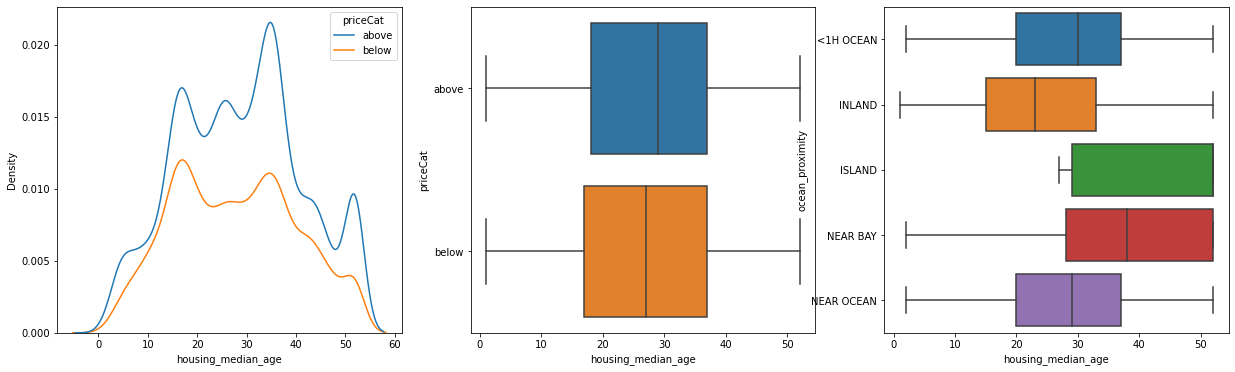

<Figure size 432x288 with 0 Axes>

In [27]:
fig, axes = plt.subplots(1,3, figsize=(21,6))
sns.kdeplot(hue="priceCat",x="housing_median_age", data=df, ax=axes[0])
sns.boxplot(y="priceCat", x="housing_median_age",data=df, ax=axes[1])
sns.boxplot(y="ocean_proximity", x="housing_median_age",data=df, ax=axes[2])
plt.show()
plt.tight_layout()

<AxesSubplot:xlabel='housing_median_age', ylabel='median_house_value'>

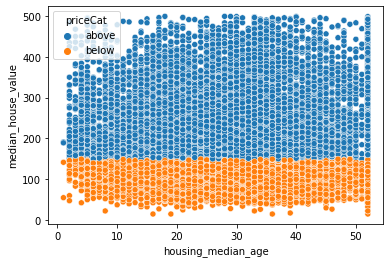

In [28]:
sns.scatterplot(x="housing_median_age",y="median_house_value",data=df, hue="priceCat")
#sns.histplot(x="housing_median_age", y="median_house_value", data=df)

## Korrelationsanalyse mit Feature Engineering

### Korrelationsanalyse und neue Features

Die Pearson-Korrelationskoeffizienten zeigen starke Abhängigkeiten zwischen den Variablen *total rooms*, *total bedrooms*, *population* und *households*.

Zur Vermeidung von Multi-Kolinearität dürfen die Werte nicht verwendet werden. Jedoch können damit weitere Features ermittelt werden.
- *Population* und *Haushalt* lassen sich zur Ermittlung der durchschnittlichen *Personen pro Haushalt* verwenden.
- Ein mittlerer Wert zu *Räume pro Haushalt* und zum *Schlafzimmer-Anteil* ermöglichen einen Schluss auf die Hausgröße, welche wiederum Einfluss auf den Wert des Hauses haben könnte.

Bei Letzteren muss dennoch auf Kolinearität geachtet werden. Da für die Anzahl an Schlafzimmern und Anzahl an Räumen ein Zusammenhang unterstellt werden kann.

Ferner wird auch eine deutliche Korrelation zwischen *median_income* und *median_house_value* erkennbar.

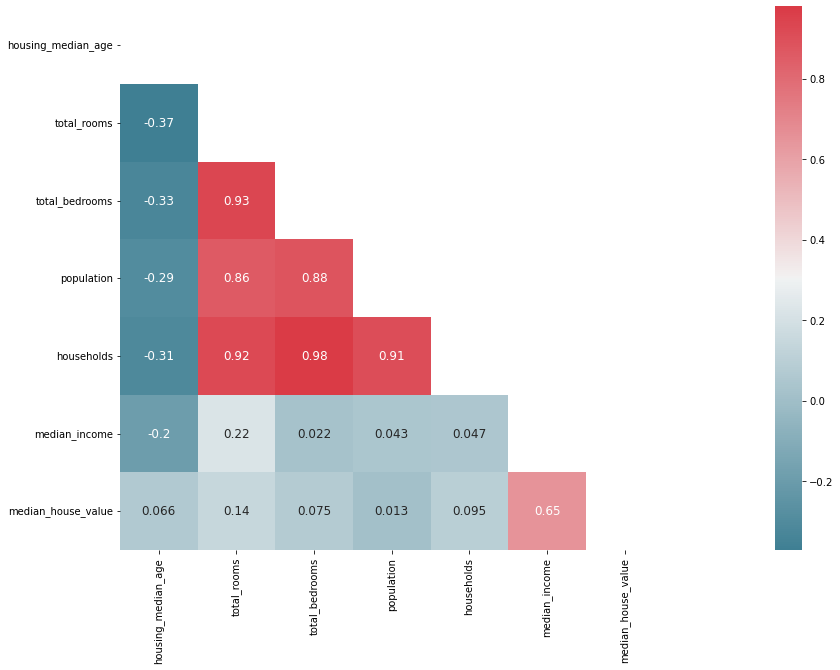

In [29]:
# Calculate correlation using the default method ( "pearson")
corr = df.corr()
# optimize aesthetics: generate mask for removing duplicate / unnecessary info
mask = np.zeros_like(corr, dtype=bool)
mask[np.triu_indices_from(mask)] = True
# Generate a custom diverging colormap as indicator for correlations:
cmap = sns.diverging_palette(220, 10, as_cmap=True)
# Plot
fig, axes = plt.subplots(1,1, figsize=(40,10))
sns.heatmap(corr, mask=mask, cmap=cmap, annot=True, square=True, annot_kws={"size": 12});

In [30]:
df["person_per_household"] = df["population"]/df["households"]
df["share_bedrooms"] = df["total_bedrooms"]/df["total_rooms"]
df["rooms_per_household"] = df["total_rooms"]/df["households"]
df = df.drop(["total_rooms","total_bedrooms","population","households"],axis=1)
df

,housing_median_age,median_income,median_house_value,ocean_proximity,priceCat,person_per_household,share_bedrooms,rooms_per_household
0,41.0,8.3252,452.6,NEAR BAY,above,2.555556,0.146591,6.984127
1,21.0,8.3014,358.5,NEAR BAY,above,2.109842,0.155797,6.238137
2,52.0,7.2574,352.1,NEAR BAY,above,2.802260,0.129516,8.288136
3,52.0,5.6431,341.3,NEAR BAY,above,2.547945,0.184458,5.817352
4,52.0,3.8462,342.2,NEAR BAY,above,2.181467,0.172096,6.281853
...,...,...,...,...,...,...,...,...
20635,25.0,1.5603,78.1,INLAND,below,2.560606,0.224625,5.045455
20636,18.0,2.5568,77.1,INLAND,below,3.122807,0.215208,6.114035
20637,17.0,1.7000,92.3,INLAND,below,2.325635,0.215173,5.205543
20638,18.0,1.8672,84.7,INLAND,below,2.123209,0.219892,5.329513


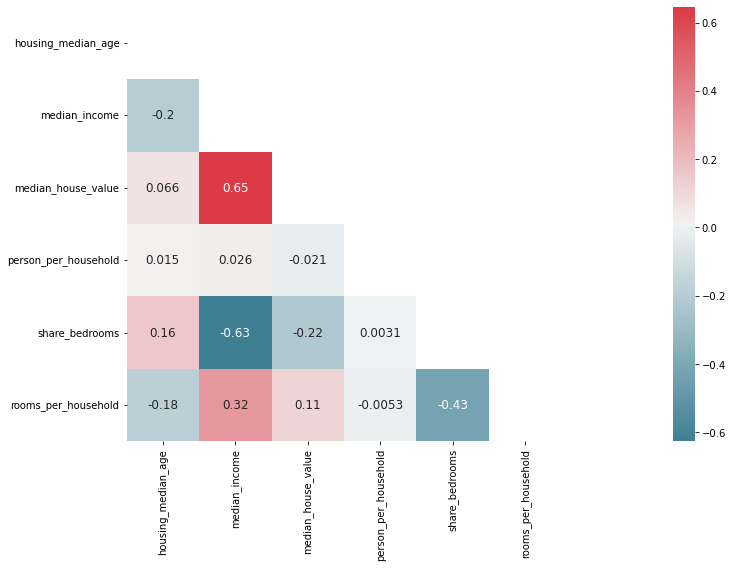

In [31]:
# Calculate correlation using the default method ( "pearson")
corr = df.corr()
# optimize aesthetics: generate mask for removing duplicate / unnecessary info
mask = np.zeros_like(corr, dtype=bool)
mask[np.triu_indices_from(mask)] = True
# Generate a custom diverging colormap as indicator for correlations:
cmap = sns.diverging_palette(220, 10, as_cmap=True)
# Plot
fig, axes = plt.subplots(1,1, figsize=(40,8))
sns.heatmap(corr, mask=mask, cmap=cmap, annot=True, square=True, annot_kws={"size": 12});

## Überblick zu neuen Features und Transformation

Nachfolgend werden die Verteilungen auf für die neuen Features betrachtet.

* *persons_per_household* hat einige ungewöhnliche Ausreißer mit im Mittel über Tausend Personen pro Haushalt in einem Distrikt.
* Das Feature *person_per_household* wird mit dem 4-fachen der Interquartilsabweichung von Ausreißern nach Oben bereinigt.
* Die Features *rooms_per_household* und *person_per_household* werden mit Log-Transformation bearbeitet, um weiteren starke Ausreißern weniger Gewicht zu geben.
    * Das Datenset wird um zwei Spalten erweitert: *sm_PpH* und *sm_RpH*
    * Die neuen Spalten enthalten die Log-Transformation für Modellierung mit Statsmodels
    * Die ursprünglichen Spalten bleiben erhalten für die Verarbeitung in der SKLearn Pipeline und werden bei Bedarf für die Splines verwendet.

Das Feature *share_bedrooms* ist wegen seiner Beschaffenheit (Anteil) bereits zwischen 0 und 1 normiert und muss nicht weiter angepasst werden.
</br>Die Verteilungen nach Preiskategorie sind nicht sehr unterschiedlich.

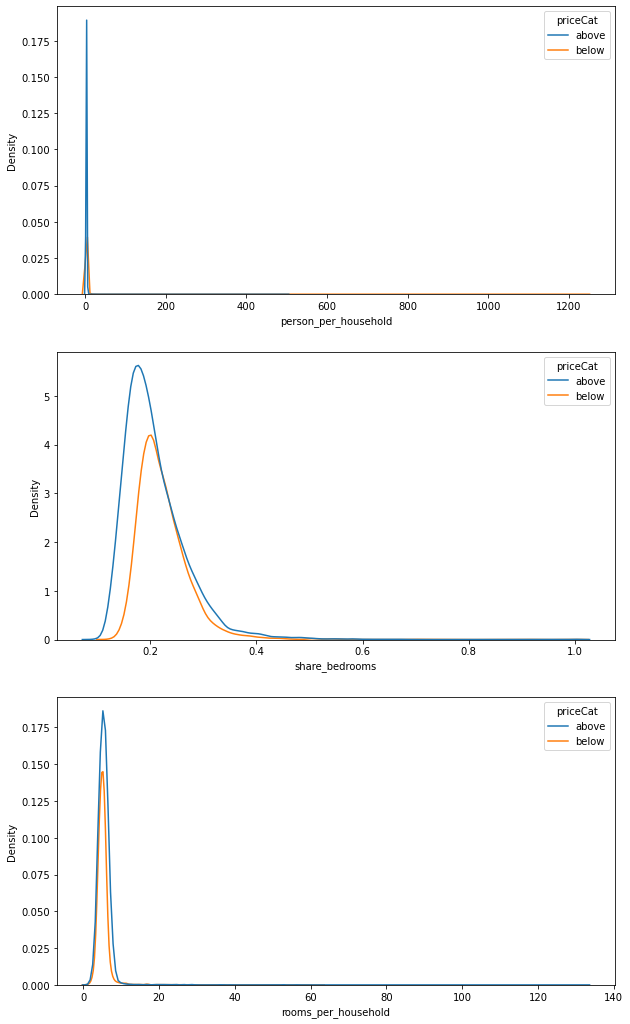

<Figure size 432x288 with 0 Axes>

In [32]:
hue_ = "priceCat"
fig, axes = plt.subplots(3,1, figsize=(10,18))
sns.kdeplot(hue=hue_ ,x="person_per_household", data=df, ax=axes[0])
sns.kdeplot(hue=hue_ , x="share_bedrooms",data=df, ax=axes[1])
sns.kdeplot(hue=hue_ , x="rooms_per_household",data=df, ax=axes[2])
plt.show()
plt.tight_layout()

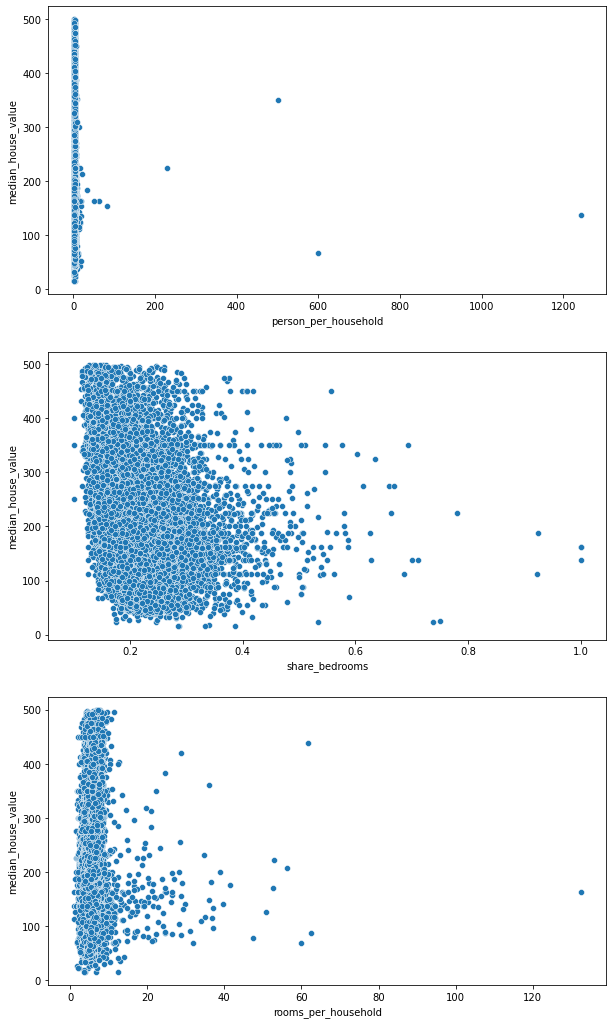

<Figure size 432x288 with 0 Axes>

In [33]:
hue_ = "priceCat"
fig, axes = plt.subplots(3,1, figsize=(10,18))
sns.scatterplot(y="median_house_value", x="person_per_household", data=df, ax=axes[0])
sns.scatterplot(y="median_house_value", x="share_bedrooms",data=df, ax=axes[1])
sns.scatterplot(y="median_house_value", x="rooms_per_household",data=df, ax=axes[2])
plt.show()
plt.tight_layout()

,housing_median_age,median_income,median_house_value,person_per_household,share_bedrooms,rooms_per_household
count,19448.000000,19448.000000,19448.000000,19448.000000,19448.000000,19448.000000
mean,28.364716,3.676430,192.017667,3.097483,0.214933,5.363847
std,12.510260,1.569596,97.095551,10.693511,0.056922,2.301255
min,1.000000,0.499900,14.999000,0.692308,0.100000,0.846154
25%,18.000000,2.526275,116.400000,2.445931,0.177648,4.418320
50%,28.000000,3.450750,173.700000,2.837171,0.204545,5.186745
75%,37.000000,4.583300,247.800000,3.304772,0.240879,5.971083
max,52.000000,15.000100,499.100000,1243.333333,1.000000,132.533333


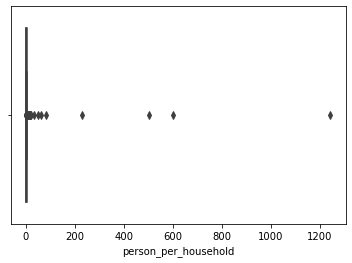

In [34]:
sns.boxplot(data=df, x="person_per_household")
df.describe()


In [35]:
iqr_ = np.percentile(df.person_per_household,q=[25,75])
cut_ = 4*(iqr_[1]-iqr_[0]) + iqr_[1]
print("IQR:",cut_)


df = df[df.person_per_household < cut_] #75th Percentile oder auch 3. Quantil wird als Obergrenze für Personen pro Haushalt verwendet.
df.describe()

IQR: 6.740136516316871


,housing_median_age,median_income,median_house_value,person_per_household,share_bedrooms,rooms_per_household
count,19379.000000,19379.000000,19379.000000,19379.000000,19379.000000,19379.000000
mean,28.366686,3.677721,192.142690,2.929914,0.214815,5.364710
std,12.500313,1.568808,97.124094,0.732906,0.056579,2.298734
min,1.000000,0.499900,14.999000,0.692308,0.100000,0.846154
25%,18.000000,2.527350,116.400000,2.444509,0.177624,4.419756
50%,28.000000,3.451900,173.800000,2.834244,0.204518,5.187870
75%,37.000000,4.583300,247.900000,3.298800,0.240728,5.971846
max,52.000000,15.000100,499.100000,6.739583,1.000000,132.533333


<AxesSubplot:xlabel='person_per_household', ylabel='priceCat'>

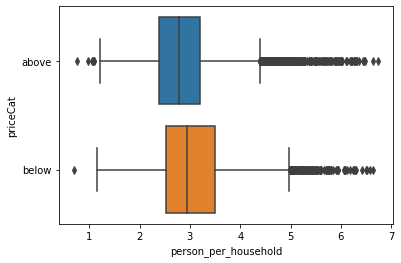

In [36]:
sns.boxplot(data=df, x="person_per_household", y="priceCat")

In [37]:
L = df.index[(df['rooms_per_household']<1)|(df['person_per_household']<1)].tolist()
df = df.drop(index=L)
df.describe()

,housing_median_age,median_income,median_house_value,person_per_household,share_bedrooms,rooms_per_household
count,19374.000000,19374.000000,19374.000000,19374.000000,19374.000000,19374.000000
mean,28.367813,3.678088,192.146056,2.930312,0.214741,5.364173
std,12.499801,1.568657,97.124915,0.732478,0.056224,2.292389
min,1.000000,0.499900,14.999000,1.060606,0.100000,1.000000
25%,18.000000,2.527575,116.400000,2.444795,0.177622,4.420299
50%,28.000000,3.452900,173.850000,2.834538,0.204516,5.188198
75%,37.000000,4.583300,247.900000,3.299094,0.240715,5.971931
max,52.000000,15.000100,499.100000,6.739583,1.000000,132.533333


In [38]:
a_ = "person_per_household"
b_ = "rooms_per_household"
df["sm_PpH"] = np.log(df.loc[:,[a_]]) #Log-Transformation in extra Spalte für Statsmodels OLS
df["sm_RpH"] = np.log(df.loc[:,[b_]]) #Log-Transformation in extra Spalte für Statsmodels OLS

<AxesSubplot:xlabel='share_bedrooms', ylabel='Density'>

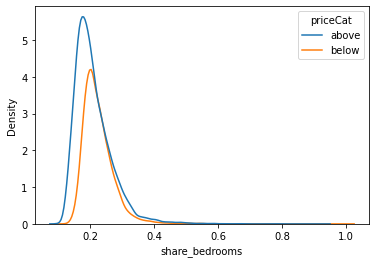

In [39]:
hue_ = "priceCat"
sns.kdeplot(hue=hue_ , x="share_bedrooms",data=df)

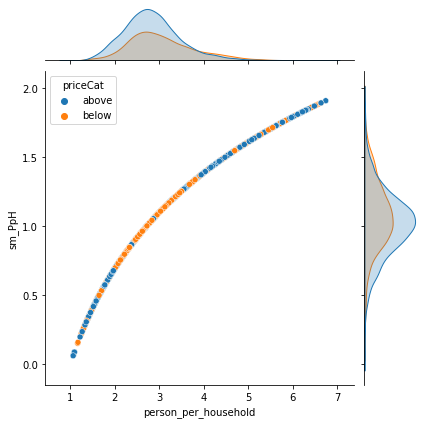

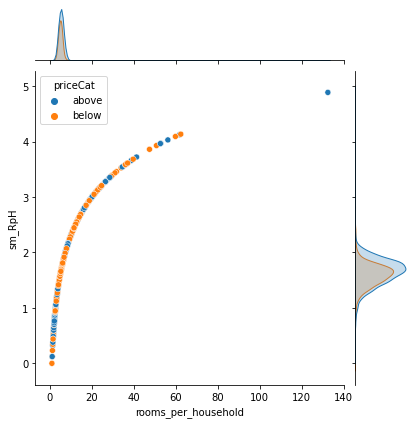

In [40]:
# Plots zur Kontrolle der erfolgreichen Log-Transformation
sns.jointplot(hue=hue_ , x="person_per_household", y="sm_PpH", data=df)
sns.jointplot(hue=hue_ , x="rooms_per_household", y="sm_RpH",data=df)

## Lage-Kategorien

### Zusammenfassung Preiskategorie

Bisher wurden die Verteilungen mit Unterschieden bzgl. Preiskategorie betrachtet.
Es bleibt festzuhalten, dass nur das Median-Einkommen und die Lage einen Unterschied ausmachen.


### Die Lage-Kategorie: *ocean_proximity*

Der Datensatz unterscheidet nach insgesamt fünf Lagen. Das folgende Säulendiagramm zeigt die Anzahl der Datensätze zur jeweiligen Lage, gefolgt von einem Boxplot.

1. Weniger als 1H zum Ozean
2. Inland
3. Insel
4. In der Nähe zur Bucht
5. In der Nähe zum Ozean

Trotz der sehr geringen Anzahl von 5 Stück hat die Insel-Lage noch einen weit spannenden Boxplot, jedoch mit Median deutlich über den der anderen Kategorien.</br>
Es ist möglich, dass diese Datensätze gelöscht oder in eine passende Kategorie überführt werden.

Die Datensätze *Nähe zur Bucht* und *Nähe zum Ozean* sind vergleichbar groß und haben eine nahezu identische Verteilung. Eine Zusammenlegung ist sinnvoll. </br>
Damit entsteht eine gemeinsame Lage für Küstennähe: *Coast*. Fraglich ist nur ob eine Zusammenlegung mit *<1H OECAN* sinnvoll wäre. Leider stehen keine Informationen zur Datenerhebung zur Verfügung und es kann nicht geprüft werden wie stark der Unterschied zwischen Küstennähe und *<1H OCEAN* tatsächlich ist.

Folgende Argumentation steht hinter der Entscheidung aus die Lage-Kategorie auf zwei Ausprägungen zu verdichten.</br>
Die neue Ausprägung lautet *Coast* oder *Inland* und wird in der Spalte *Proximity* angegeben. Die Werte für *Island* gehen in *Coast* ein.

**Für die Verknüpfung von *<1H Ocean* mit der neuen *Coast*-Lage sprechen:**
* Bei der Angabe von einer Stunde könnte es sich um einen Fußweg oder eine Autofahrt handeln.
* Alle Mediane liegen laut Boxplot über dem von *Inland*.
* Die Verteilung für die Coast-Lagen liegen vollständig unterhalb der von *<1H OCEAN*. Siehe dazu Dichteplot unter dem Boxplot.
* Laut Boxplot wird die Lage *Inland* mit geringeren Immobilienwerten in Verbindung gesetzt.
* Bei der Analyse von *median_house_value* wurde eine deutliche Unterrepräsentation in der Anzahl an *below*-Werten in der Preiskategorie festgestellt.
* Das Verhältnis von *below* zu *above* entspricht ungefähr dem Verhältnis von *Inland* zu *Coast inkl. <1H Ocean*
    * *below/above* = 7486 / 12947 = 57.8 %
    * *Inland/Coast inkl. <1H Ocean* = 6436 / (8473+5+2065+2395) = 49.8 %

**Dagegen sprechen:**
* In den Lagen könnten Einkommen etc. unterschiedlich verteilt sein und entsprechende Informationen verloren gehen. **Aber diese Zusammenhänge wollen wir nicht modellieren.**

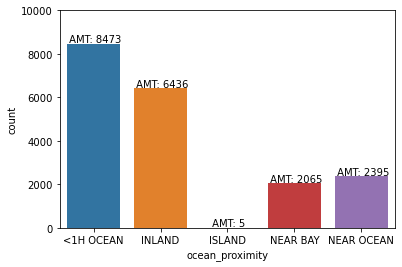

<AxesSubplot:xlabel='ocean_proximity', ylabel='median_house_value'>

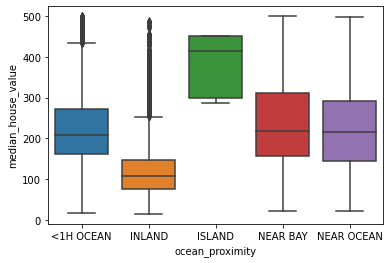

In [41]:
op = sns.countplot(x="ocean_proximity", data=df)
for p in op.patches:
    op.annotate(f'\n AMT: {p.get_height()}', (p.get_x()+0.4,p.get_height()+950), ha="center", va="top", color="black", size="10")
plt.ylim(0,10000)
plt.show()

sns.boxplot(data=df,x="ocean_proximity",y="median_house_value")

<AxesSubplot:xlabel='median_house_value', ylabel='Density'>

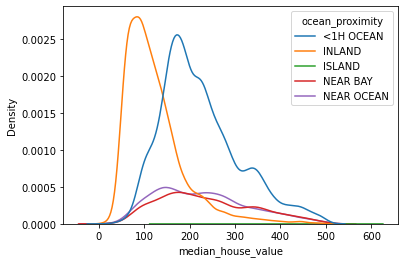

In [42]:
sns.kdeplot(x="median_house_value", hue="ocean_proximity", data=df)

<AxesSubplot:xlabel='median_house_value', ylabel='Density'>

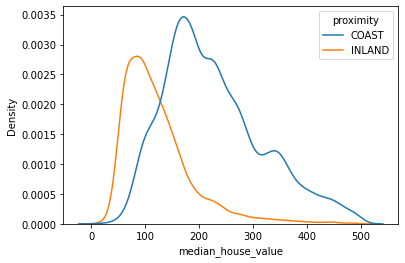

In [43]:
x = df.ocean_proximity
df["proximity"] = np.where((x=="NEAR BAY") | (x=="NEAR OCEAN") | (x=="<1H OCEAN") | (x=="ISLAND"),"COAST",x)
df["proximity"] = df["proximity"].astype("category")
df = df.drop("ocean_proximity", axis=1)
sns.kdeplot(x="median_house_value", hue="proximity", data=df)

# Data Export

* Der analysierte Datensatz enthält weiterhin zukünftige Test- und Trainingsdaten, wie in Introduction besprochen.
* Die durchgeführten Transformationen haben keine Informationen von Mittelwerten oder sonstigen Lagemaßen verwendet.
    * D.h. diese werden nicht in der nachfolgenden Pipeline oder bei getrennter Modellierung beachtet werden.
* 1266 Datensätze wurden entfernt.

Nachfolgend eine Übersicht zum finalen Datensatz und eine Export-Codezeile.

In [44]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 19374 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column                Non-Null Count  Dtype   
---  ------                --------------  -----   
 0   housing_median_age    19374 non-null  float64 
 1   median_income         19374 non-null  float64 
 2   median_house_value    19374 non-null  float64 
 3   priceCat              19374 non-null  category
 4   person_per_household  19374 non-null  float64 
 5   share_bedrooms        19374 non-null  float64 
 6   rooms_per_household   19374 non-null  float64 
 7   sm_PpH                19374 non-null  float64 
 8   sm_RpH                19374 non-null  float64 
 9   proximity             19374 non-null  category
dtypes: category(2), float64(8)
memory usage: 1.9 MB


In [45]:
df.to_csv("ready_data.csv", index=False)